In [1]:
from os import path
from glob import glob
from tqdm import tqdm
import torch
import numpy as np
import matplotlib.pyplot as plt

In [137]:
result = torch.load('emb_result_2048.pth')

In [138]:
print(torch.mean(result,0))

tensor([-3.0733,  2.5914,  2.7220,  ...,  2.2536,  3.0156, -3.2385])


In [139]:
result.size()

torch.Size([2871, 2048])

In [140]:
mean_vec = torch.mean(result,0)

In [141]:
dist_vec = torch.cdist(mean_vec.reshape(1,-1), result)
print(dist_vec)

tensor([[7.8401, 9.5831, 3.7113,  ..., 3.2022, 4.0141, 1.5245]])


In [142]:
torch.min(dist_vec)

tensor(0.5248)

In [143]:
torch.max(dist_vec)

tensor(36.2992)

In [144]:
np_dist_vec = dist_vec.detach().numpy()[0]
rank = np.argsort(np_dist_vec)
print(rank[-4:])
print(rank[-10:])
np.argmax(np_dist_vec)

[1380  651  819 1344]
[2334 2120  919 2843 2819 1412 1380  651  819 1344]


1344

min
[2814  312 2861  440]
[2814  312 2861  440  137 1922 1877 1014 1764    7]  
max
[1346 1333 1344 2074]
[1015 2779  734 1002 1518  651 1346 1333 1344 2074]  
2epoch
max [1380  651  819 1344]
[2334 2120  919 2843 2819 1412 1380  651  819 1344]

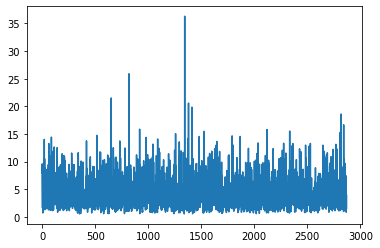

In [145]:
plt.plot(np_dist_vec)

In [146]:
nomalize_vec = np_dist_vec / max(np_dist_vec)

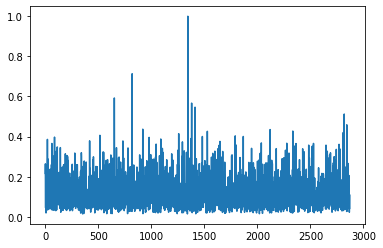

In [147]:
plt.plot(nomalize_vec)

In [148]:
for idx, data in enumerate(nomalize_vec):
    if data > 0.8:
        print(idx)

1344


In [151]:
for idx, data in enumerate(nomalize_vec):
    if data < 0.02:
        print(idx)

7
334
352
363
467
580
620
630
776
921
1063
1244
1290
1340
1419
1523
1694
1701
1992
2019
2048
2116
2133
2332
2600


In [152]:
broken = [1118,1904,2392,2441,2602]
for idx in broken:
    dist_vec = torch.cdist(result[idx].reshape(1,-1), result)
    np_dist_vec = dist_vec.detach().numpy()[0]
    np_dist_vec[idx] = np_dist_vec.max()
    print(np_dist_vec.argmin())

1714
79
1782
697
2639


min
1308
528
682
827
628

In [163]:
broken_val = torch.index_select(result,0,torch.tensor(broken))
print(broken_val.shape)
dist_vec = torch.cdist(torch.mean(broken_val,0).reshape(1,-1), result)
dist_vec = dist_vec.reshape(-1)

torch.Size([5, 2048])


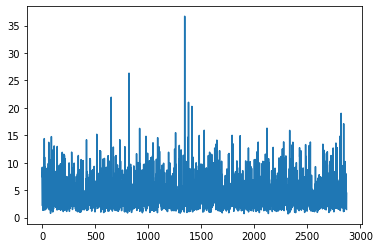

In [164]:
plt.plot(dist_vec)

In [166]:
rank = np.argsort(dist_vec)
print(rank[-4:])
print(rank[-10:])
np.argmax(dist_vec)

tensor([1380,  651,  819, 1344])
tensor([1528,  919, 2120, 2843, 2819, 1412, 1380,  651,  819, 1344])


tensor(1344)

tensor([1380,  651,  819, 1344])  
tensor([1528,  919, 2120, 2843, 2819, 1412, 1380,  651,  819, 1344])